<a href="https://colab.research.google.com/github/gabriel-cm-saldanha/Covid19-Analysis/blob/main/Panorama_do_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---
  

# Panorama do COVID-19 no Brasil

COVID-19 é uma doença infecciosa causada por recém-descoberto coronavírus.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é, não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.

<center><img alt="Colaboratory logo" width="50%" src="https://static.poder360.com.br/2022/12/coronavirus-imagem-1-848x477.jpg"></center>

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença.

## Sobre os Dados

*Descreva a fonte dos seus dados e um breve resumo sobre o que se pode esperar desse dataset.*

*Fale sobre a dificuldade de se analisar uma doença novas, os conflitos existentes entre os dados dos governos federal, estaduais e os não oficiais.*


### Dicionário de Variáveis
* *Construa um dicionário de variáveis.*
    * `iso_code`,
    * `continent`,
    * `location`,
    * `date`,
    * `total_cases`,
    * `new_cases`,
    * `total_deaths`,
    * `new_deaths`,
    * `total_cases_per_million`,
    * `new_cases_per_million`,
    * `total_deaths_per_million`,
    * `new_deaths_per_million`,
    * `total_tests`, `new_tests`,
    * `total_tests_per_thousand`,
    * `new_tests_per_thousand`,
    * `new_tests_smoothed`,
    * `new_tests_smoothed_per_thousand`,
    * `tests_units`,
    * `stringency_index`,
    * `population`,
    * `population_density`,
    * `median_age`,
    * `aged_65_older`,
    * `aged_70_older`,
    * `gdp_per_capita`,
    * `extreme_poverty`,
    * `diabetes_prevalence`,
    * `female_smokers`,
    * `male_smokers`,
    * `handwashing_facilities`,
    * `hospital_beds_per_thousand`

    * *A descrição do nome de cada coluna pode ser encontrada [neste link](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data-codebook.md).*


### Obtenção dos dados do COVID-19

* Os dados utilizados nessa análise são disponibilizados neste repositório o qual é constantemente atualizado [https://github.com/owid/covid-19-data/tree/master/public/data](https://github.com/owid/covid-19-data/tree/master/public/data) e conhecer a base dados. Usaremos o formato `csv` neste projeto.

* Caso encontre algum problema em baixar diretamente do repositório oficial, você pode usar [este link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/owid-covid-data.csv) (atualizado até 14 de junho de 2020).


## Configurando o Notebook

In [1]:
# importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

pd.set_option('display.max_columns', None)
#pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Análise Exploratória dos Dados

*Crie uma breve contextualização sobre o que será feito na fase de Análise Exploratória de Dados...*

In [102]:
df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data-old.csv")
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.122,0.122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


### Análise Exploratória Inicial

In [3]:
print(f"Entradas:\t {df.shape[0]}")
print(f"Variáveis:\t {df.shape[1]}")

df.dtypes

Entradas:	 262423
Variáveis:	 67


iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                 float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

In [4]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

#### Verificando Dados Nulos e Duplicados

Os valores nulos encontrados no dataset fazem parte do processo de catalogagem dos dados, haja vistos que nem todos os países tiveram casos da doença na mesma data, ou vacinação, por exemplo, existindo uma temporalidade entre os inputs, fazendo a existência desses dados nulos.
Importante ressaltarmos que dados nulos não necessariamente implicam que esses dados possuam valor de 0. Pode ser que em alguns casos sim, como vacinação, porém em casos de variaveis como morte, ou contabilização de casos, existe a possibilidade do não conhecimento dessa doença previamente, consequentemente, não fazia a coleta desses dados.

In [5]:
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)

weekly_icu_admissions                      96.655781
weekly_icu_admissions_per_million          96.655781
excess_mortality_cumulative_per_million    96.643968
excess_mortality                           96.643968
excess_mortality_cumulative                96.643968
                                             ...    
total_cases                                 5.543721
population                                  0.428697
date                                        0.000000
location                                    0.000000
iso_code                                    0.000000
Length: 67, dtype: float64

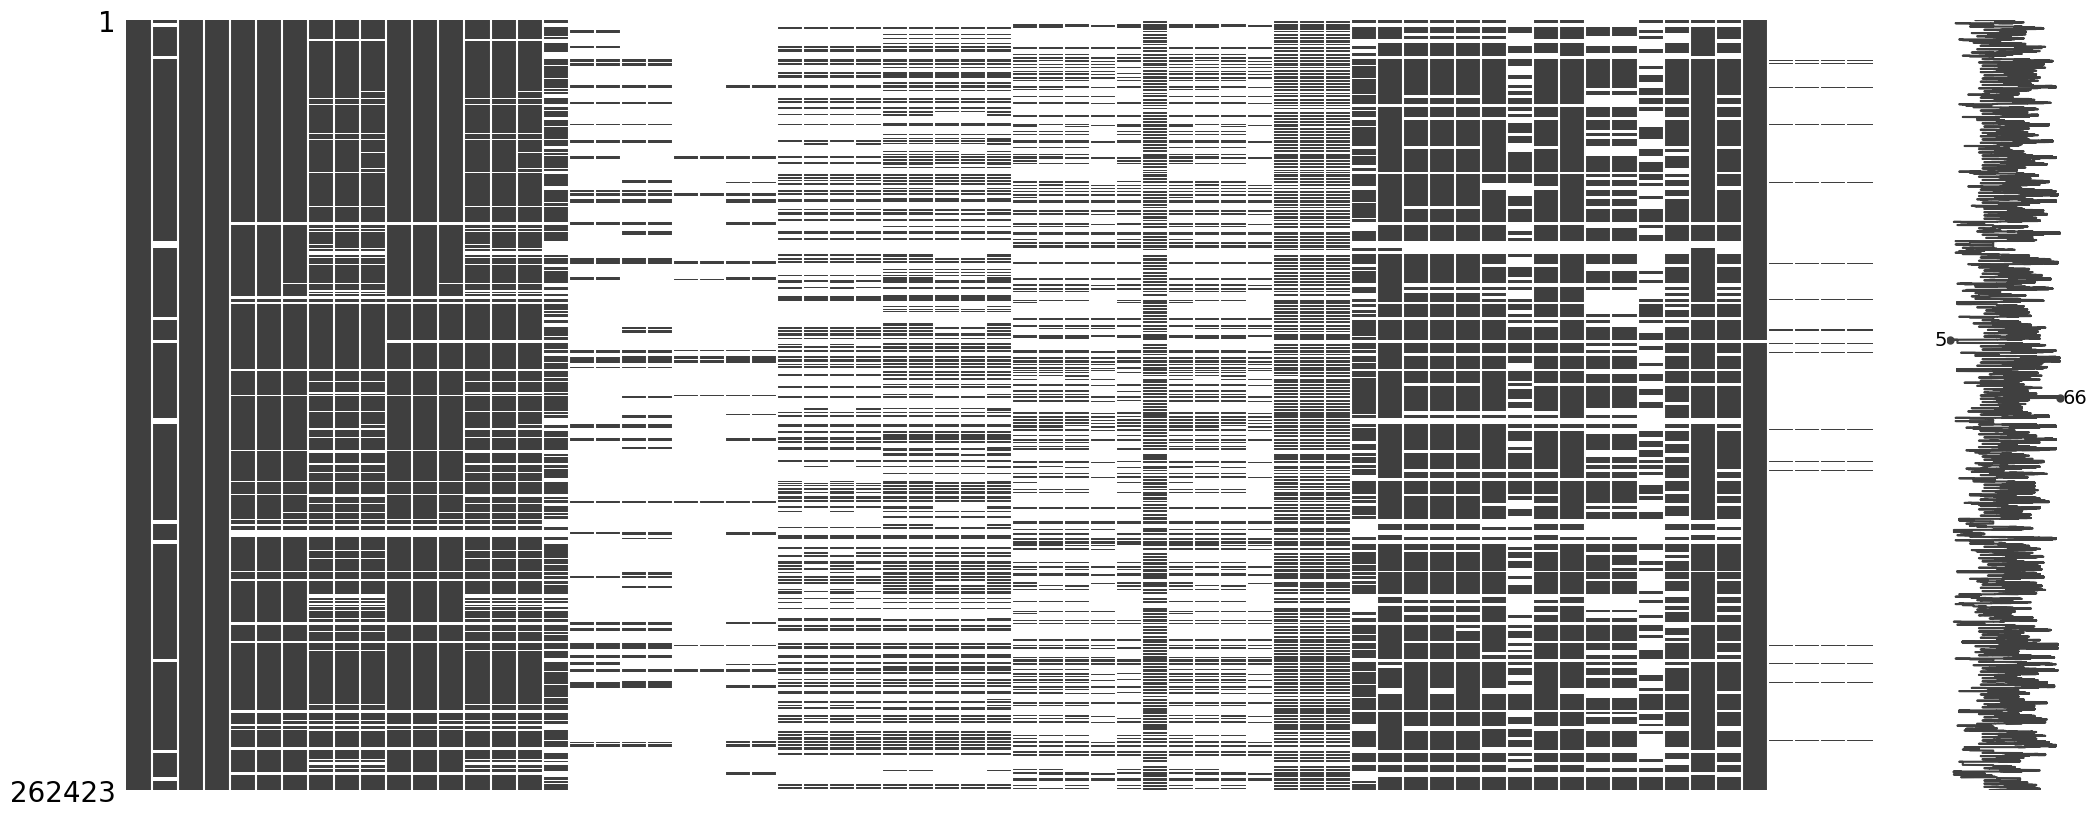

In [6]:
msno.matrix(df);

In [7]:
df.duplicated().sum()

0

#### Separando as Colunas Desejadas

A fim de simplificar um pouco a análise, separamos as features encontradas neste [dataset](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/owid-covid-data.csv) (atualizado até 14 de junho de 2020) mas utilizando as entradas do dataset de 2023 da OWID selecionado pois o de 2020 contém 24.023 entradas enquanto o de 2023 da OWID contém 262.423, permitindo uma análise mais atual dos dados.

In [8]:
cols_list = ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
        'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand']

In [9]:
new_df = df[cols_list].copy()
new_df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,0.122,0.122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,41128772.0,54.422,18.6,2.581,1.337,1803.987,NaN,9.59,NaN,NaN,37.746,0.5
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,41128772.0,54.422,18.6,2.581,1.337,1803.987,NaN,9.59,NaN,NaN,37.746,0.5
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,41128772.0,54.422,18.6,2.581,1.337,1803.987,NaN,9.59,NaN,NaN,37.746,0.5
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,41128772.0,54.422,18.6,2.581,1.337,1803.987,NaN,9.59,NaN,NaN,37.746,0.5
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,41128772.0,54.422,18.6,2.581,1.337,1803.987,NaN,9.59,NaN,NaN,37.746,0.5


In [10]:
new_df['date'] = pd.to_datetime(new_df['date'])


In [11]:
obj_cols = new_df.select_dtypes(include=['object']).columns.tolist()
num_cols = new_df.select_dtypes(exclude=['object']).columns.tolist()

print(f"Variáveis categóricas:\t {len(obj_cols)}")
print(f"Variáveis numéricas:\t {len(num_cols)}")

Variáveis categóricas:	 4
Variáveis numéricas:	 28


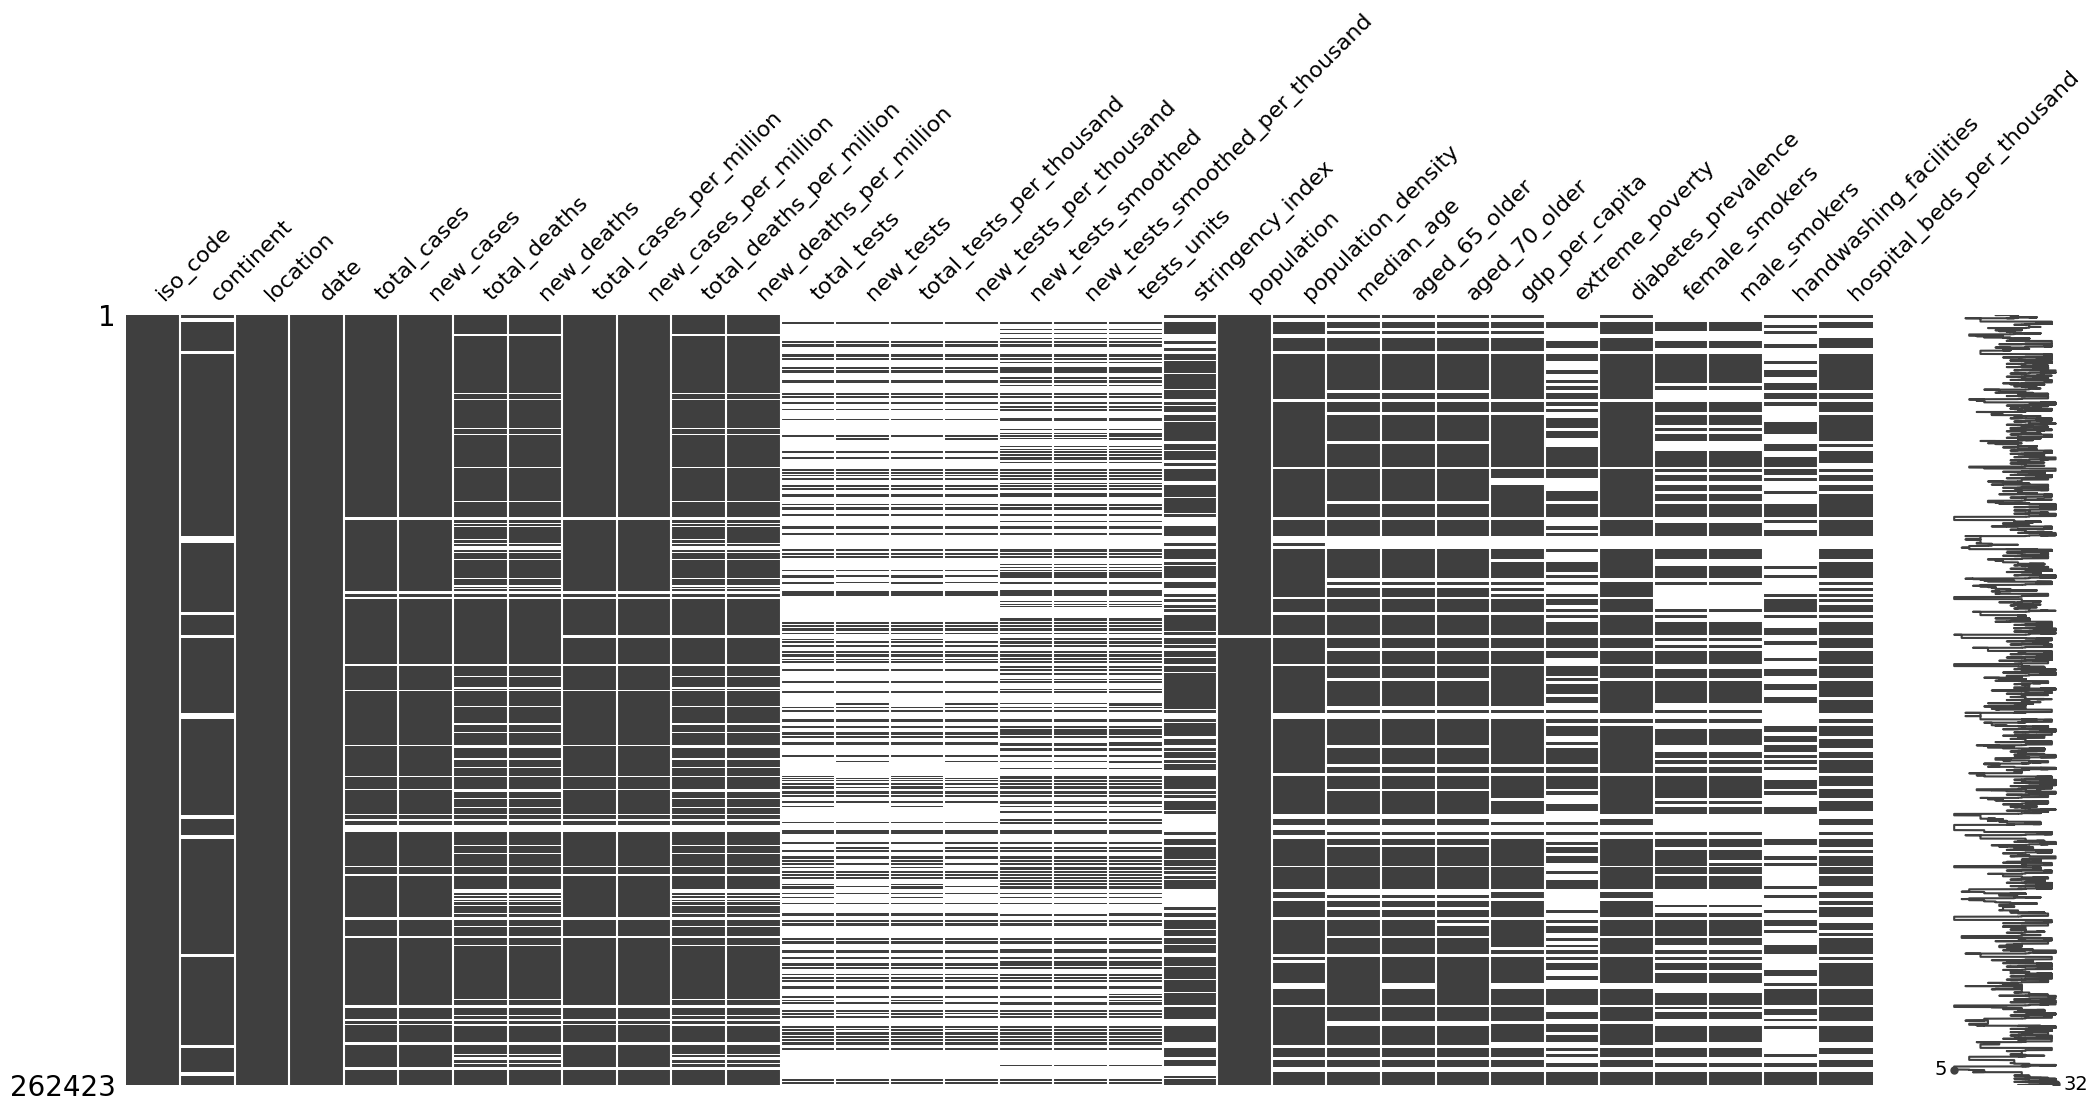

In [12]:
msno.matrix(new_df);

In [13]:
min_date = new_df.date.min()
min_date

Timestamp('2020-01-01 00:00:00')

In [14]:
max_date = new_df.date.max()
max_date

Timestamp('2023-03-07 00:00:00')

In [15]:
np.sort(new_df.iso_code.unique())

array(['ABW', 'AFG', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM',
       'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BES', 'BFA',
       'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL',
       'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL',
       'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COK', 'COL', 'COM', 'CPV',
       'CRI', 'CUB', 'CUW', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA',
       'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ERI', 'ESH', 'ESP', 'EST',
       'ETH', 'FIN', 'FJI', 'FLK', 'FRA', 'FRO', 'FSM', 'GAB', 'GBR',
       'GEO', 'GGY', 'GHA', 'GIB', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC',
       'GRD', 'GRL', 'GTM', 'GUM', 'GUY', 'HKG', 'HND', 'HRV', 'HTI',
       'HUN', 'IDN', 'IMN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR',
       'ITA', 'JAM', 'JEY', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM',
       'KIR', 'KNA', 'KOR', 'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA',
       'LIE', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAC', 'MAR', 'MCO',
       'MDA', 'MDG',

#### Criando Novas Features

In [79]:
new_df.loc[:,'death_rate'] = new_df['total_deaths'] / new_df['total_cases']
new_df.loc[:,'new_deaths_rate'] = new_df['new_deaths'] / new_df['new_cases']
new_df.loc[:,'population_death_rate'] = new_df['total_deaths'] / new_df['population']

#### Analisando a Correlação das Variáveis

<Axes: >

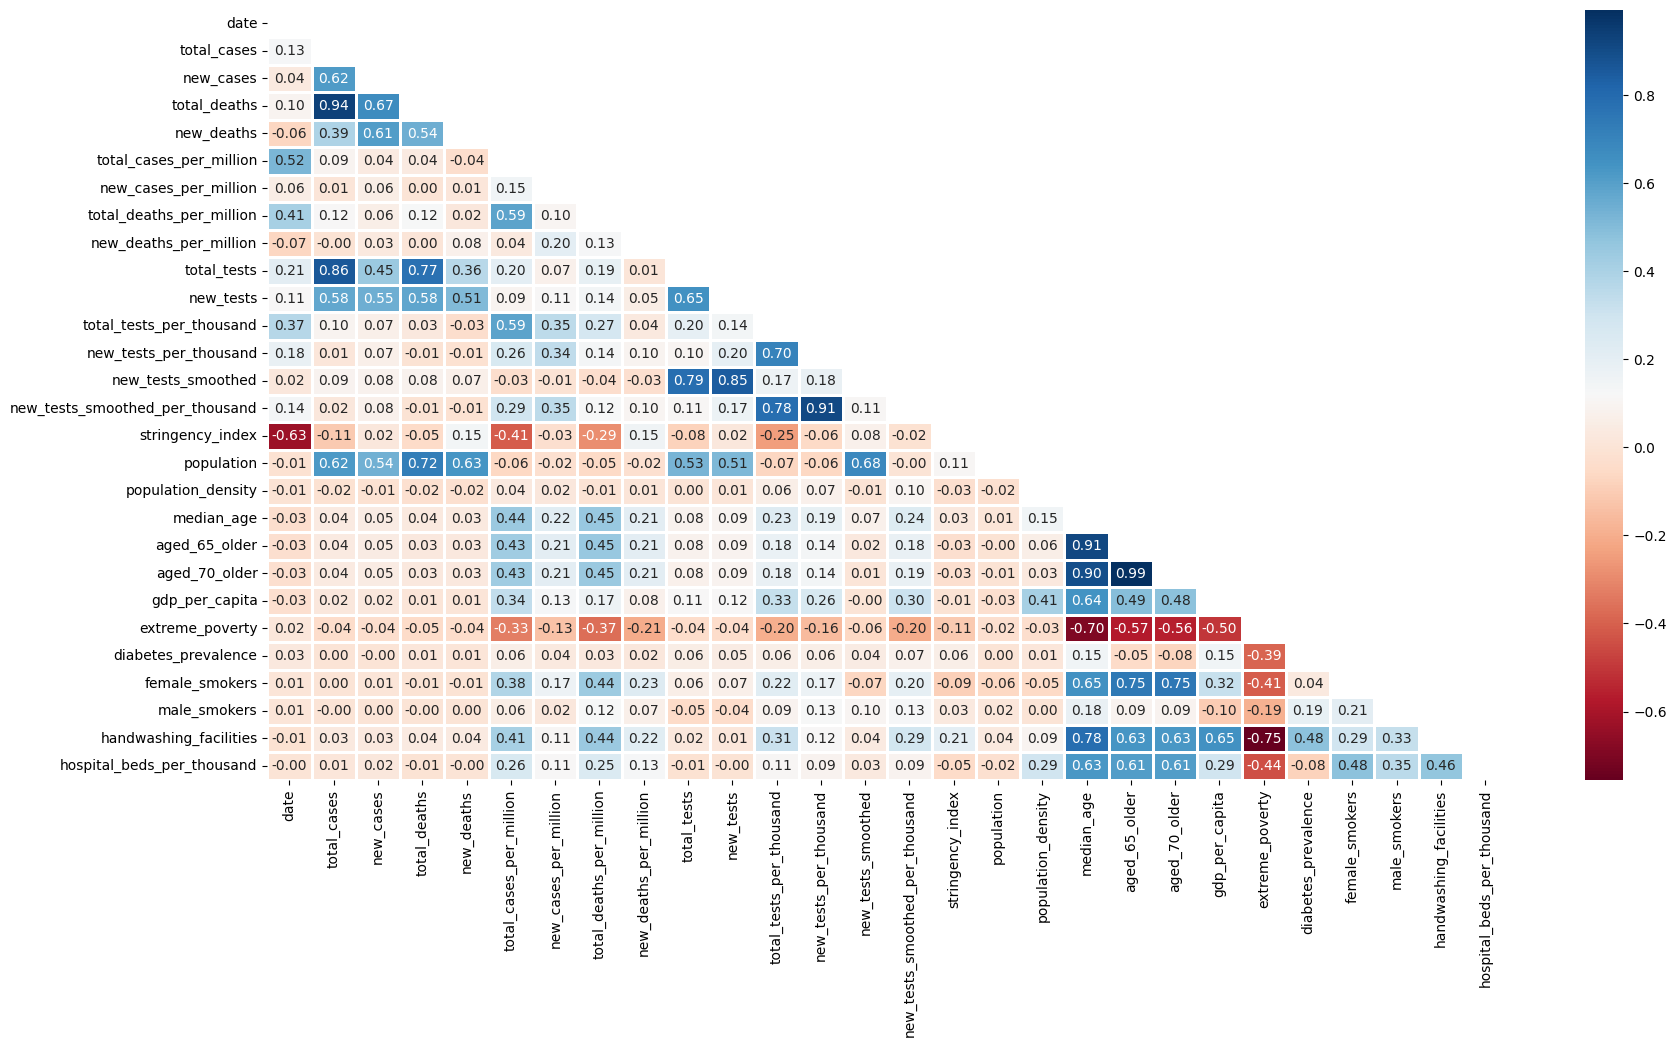

In [17]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(new_df[num_cols].corr(), cmap='RdBu', annot=True, fmt='.2f', linecolor='white', linewidths=1,
            mask= np.triu(new_df[num_cols].corr()), ax=ax)

#### Removendo os Iso_Code OWID

In [18]:
df_codes = new_df.loc[~new_df.iso_code.str.contains(r'OWID', regex=True)]

#### Análise por Periodo

Apesar do base de dados começar em 2020-01-01 o primeiro caso foi contabilizado em 2020-01-23 na Ásia e na América do Norte nos países abaixo.

In [19]:
first_case = df_codes.loc[~df_codes['total_cases'].isna()]
first_case.loc[(first_case.new_cases != 0)].sort_values(by='date').head(1)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,death_rate,new_deaths_rate
47309,CHN,Asia,China,2020-01-22,547.0,NaN,17.0,NaN,0.384,NaN,0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.39,1.425887e+09,147.674,38.7,10.641,5.929,15308.712,0.7,9.74,1.9,48.4,NaN,4.34,0.031079,NaN


In [20]:
first_case = df_codes.loc[~df_codes['new_cases'].isna()]
first_case.loc[(first_case.new_cases != 0) & (first_case.date == '2020-01-23')].sort_values(by='date').head(10)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,death_rate,new_deaths_rate
40715,CAN,North America,Canada,2020-01-23,2.0,2.0,NaN,NaN,0.052,0.052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,3.845433e+07,4.037,41.4,16.984,10.797,44017.591,0.5,7.37,12.0,16.6,NaN,2.50,NaN,NaN
47310,CHN,Asia,China,2020-01-23,639.0,92.0,18.0,1.0,0.448,0.065,0.013,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.91,1.425887e+09,147.674,38.7,10.641,5.929,15308.712,0.7,9.74,1.9,48.4,NaN,4.34,0.028169,0.01087
103390,HKG,Asia,Hong Kong,2020-01-23,2.0,2.0,NaN,NaN,0.267,0.267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89,7.488863e+06,7039.714,44.8,16.303,10.158,56054.920,NaN,8.33,NaN,NaN,NaN,NaN,NaN,NaN
138945,MAC,Asia,Macao,2020-01-23,2.0,1.0,NaN,NaN,2.877,1.438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.00,6.951800e+05,20546.766,39.2,9.798,4.991,104861.851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210528,SGP,Asia,Singapore,2020-01-23,1.0,1.0,NaN,NaN,0.177,0.177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,5.637022e+06,7915.731,42.4,12.922,7.049,85535.383,NaN,10.99,5.2,28.3,NaN,2.40,NaN,NaN
254987,VNM,Asia,Vietnam,2020-01-23,2.0,2.0,NaN,NaN,0.020,0.020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,9.818686e+07,308.127,32.6,7.150,4.718,6171.884,2.0,6.00,1.0,45.9,85.847,2.60,NaN,NaN


Criamos uma lista com os `iso_code` dos 10 países com maior número de casos totais (`total_cases`) de Covid-19 até 07-03-2023 para analisarmos outras variáveis como `total_deaths` e a feature que criamos, `death_rate`.
Observamos que os EUA é o país com maior numero de casos....

In [21]:
code_list = df_codes.loc[df_codes.date == df_codes.date.max()].sort_values(by="total_cases", ascending=False).head(10)['iso_code'].tolist()
filtered_codes = df_codes.loc[(df_codes.iso_code.isin(code_list)) & (df_codes.date == max_date)]

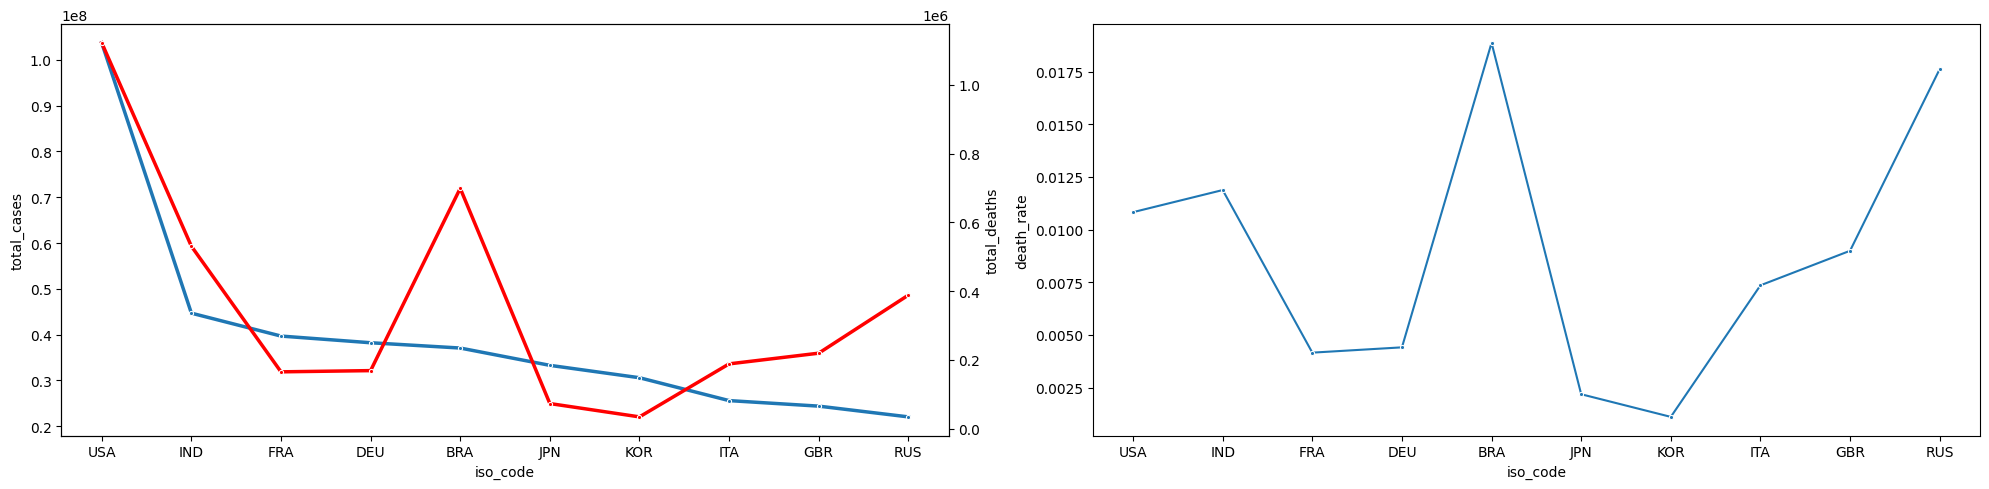

In [22]:
fig, ax = plt.subplots(
    ncols=2, figsize=(20, 5))

ax1 = sns.lineplot(x="iso_code", y="total_cases",
                 data=filtered_codes.sort_values(by="total_cases", ascending=False),
                  marker='.', linewidth=2.5, ax=ax[0])

ax2 = ax1.twinx()

ax2 = sns.lineplot(x="iso_code", y="total_deaths",
                 data=filtered_codes.sort_values(by="total_cases", ascending=False),
                  marker='.', linewidth=2.5, color='r')

ax3 = sns.lineplot(x="iso_code", y="death_rate",
                 data=filtered_codes.sort_values(by="total_cases", ascending=False),
                   marker='.',ax=ax[1])

plt.tight_layout()

In [97]:
df[df['total_cases'] > 0].groupby('location')['date'].min().reset_index()

,location,date
0,Afghanistan,2020-03-23
1,Africa,2020-03-08
2,Albania,2020-03-11
3,Algeria,2020-03-12
4,Andorra,2020-03-22
...,...,...
222,Wallis and Futuna,2021-03-21
223,World,2020-01-22
224,Yemen,2020-04-30
225,Zambia,2020-04-02


In [103]:
df[df['total_cases'] > 0.0]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.122,0.122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262418,ZWE,Africa,Zimbabwe,2023-03-03,264127.0,NaN,NaN,5668.0,0.0,0.714,16183.718,NaN,NaN,347.292,0.0,0.044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
262419,ZWE,Africa,Zimbabwe,2023-03-04,264127.0,NaN,NaN,5668.0,0.0,0.714,16183.718,NaN,NaN,347.292,0.0,0.044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
262420,ZWE,Africa,Z

<Axes: ylabel='Frequency'>

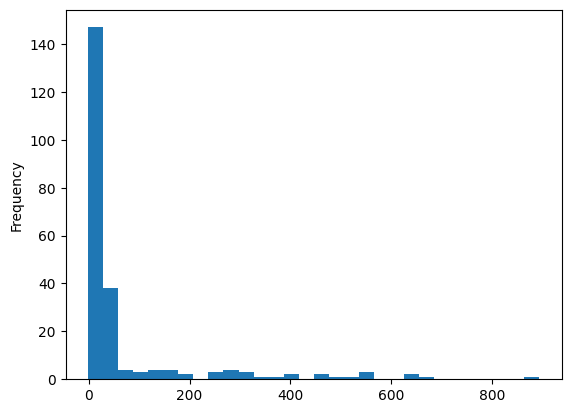

In [111]:
# Encontrando a data do primeiro caso e da primeira morte para cada localização
first_case_date = df[df['total_cases'] > 0].groupby('location')['date'].min().reset_index()
first_death_date = df[df['total_deaths'] > 0].groupby('location')['date'].min().reset_index()

# Renomeando as colunas para facilitar a fusão
first_case_date.columns = ['location', 'first_case_date']
first_death_date.columns = ['location', 'first_death_date']

# Mesclando os dois dataframes pelas localizações
merged_df = pd.merge(first_case_date, first_death_date, on='location')

# Convertendo as colunas de data para o tipo datetime
merged_df['first_case_date'] = pd.to_datetime(merged_df['first_case_date'])
merged_df['first_death_date'] = pd.to_datetime(merged_df['first_death_date'])

# Calculando a diferença entre as datas
merged_df['difference_days'] = (merged_df['first_death_date'] - merged_df['first_case_date']).dt.days
merged_df['difference_days'].plot(kind='hist',bins=30)


#### Analisando dados Globais

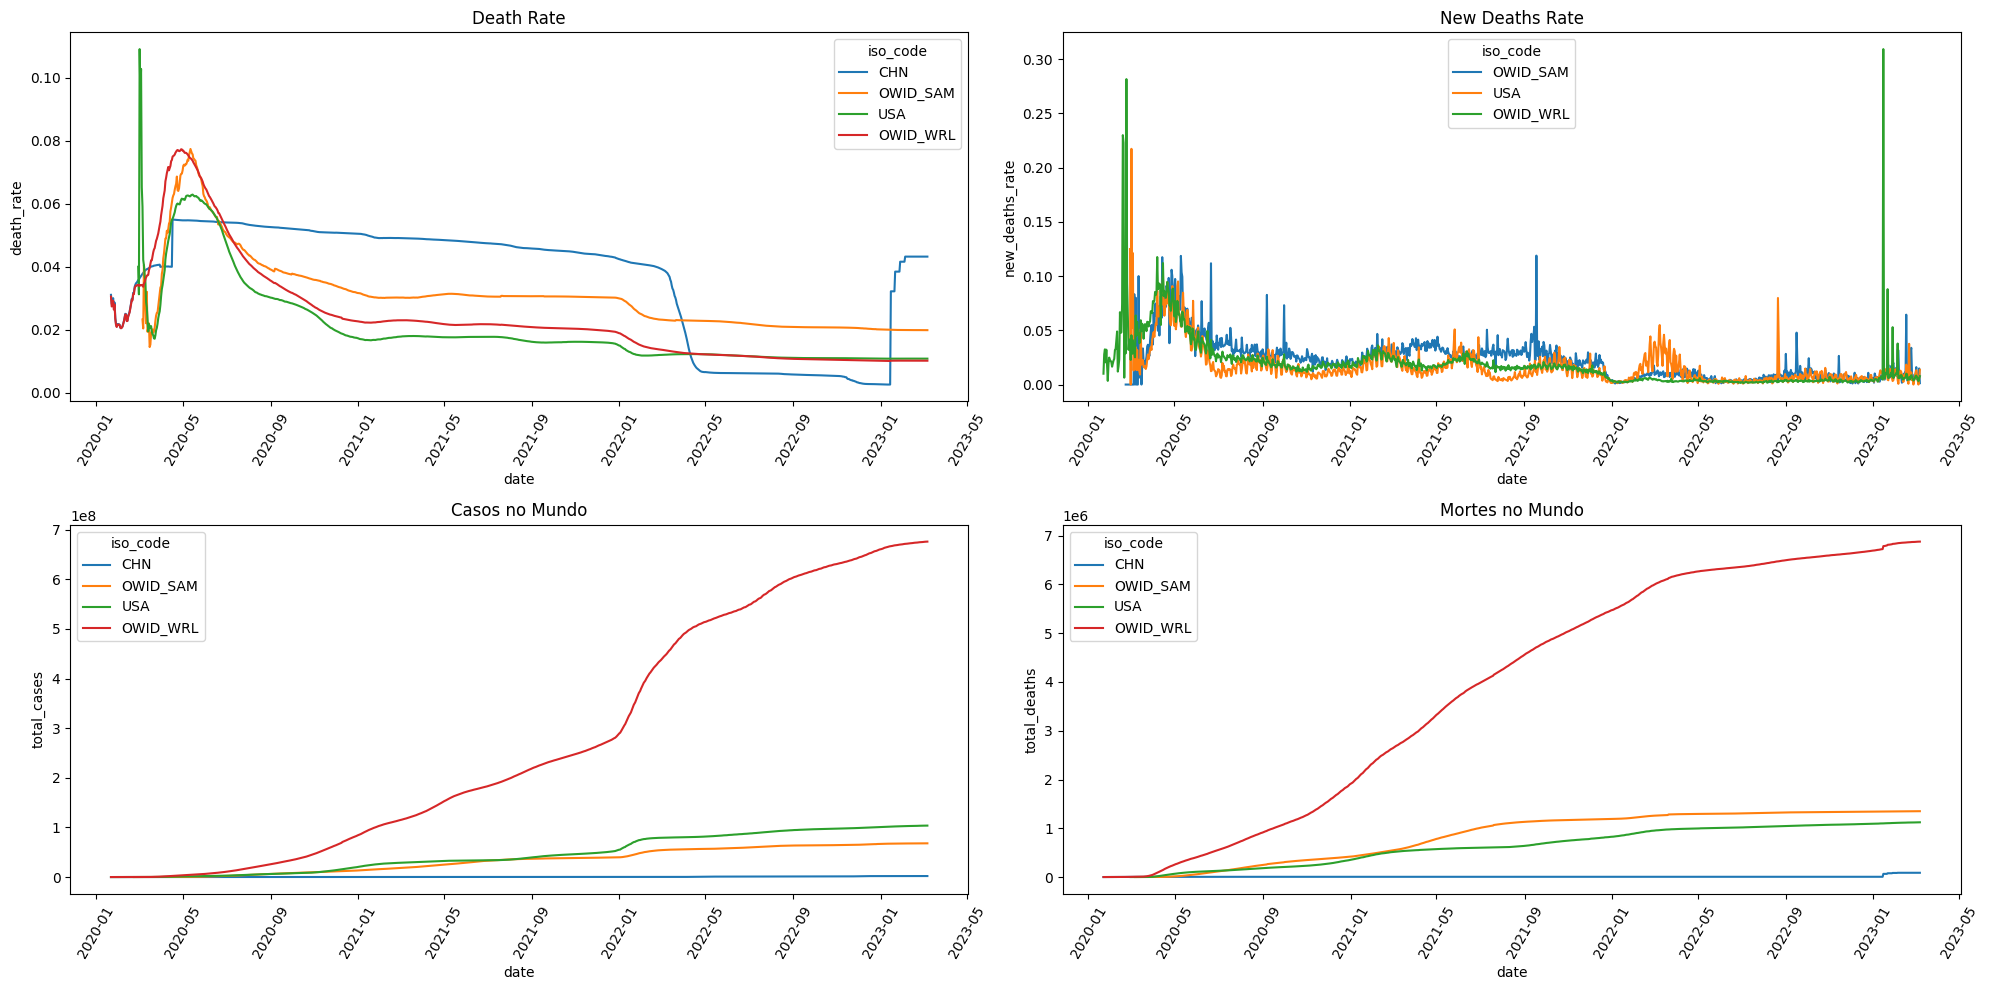

In [50]:
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(20, 10))

ax1= sns.lineplot(x="date", y="death_rate", data=new_df.loc[new_df.iso_code.isin(['OWID_WRL','CHN','USA','OWID_SAM'])], hue='iso_code', ax=ax[0,0])
ax1.tick_params(axis='x', rotation=60)
ax1.set_title('Death Rate')

ax2 = sns.lineplot(x="date", y="new_deaths_rate", data=new_df.loc[new_df.iso_code.isin(['OWID_WRL','USA','OWID_SAM'])],hue='iso_code', ax=ax[0,1]);
ax2.tick_params(axis='x', rotation=60)
ax2.set_title('New Deaths Rate')

ax3 = sns.lineplot(x="date", y="total_cases", data=new_df.loc[new_df.iso_code.isin(['OWID_WRL','CHN','USA','OWID_SAM'])], hue='iso_code', ax=ax[1,0])
ax3.tick_params(axis='x', rotation=60)
ax3.set_title('Casos no Mundo')

ax4 = sns.lineplot(x="date", y="total_deaths", data=new_df.loc[new_df.iso_code.isin(['OWID_WRL','CHN','USA','OWID_SAM'])], hue='iso_code', ax=ax[1,1])
ax4.tick_params(axis='x', rotation=60)
ax4.set_title('Mortes no Mundo')

plt.tight_layout()

In [45]:
new_df.loc[(new_df.new_deaths_rate > 1) & (new_df.iso_code == 'CHN')]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,death_rate,new_deaths_rate
47359,CHN,Asia,China,2020-03-12,80793.0,8.0,3169.0,11.0,56.662,0.006,2.222,0.008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.02,1.425887e+09,147.674,38.7,10.641,5.929,15308.712,0.7,9.74,1.9,48.4,NaN,4.34,0.039224,1.375
48173,CHN,Asia,China,2022-06-04,884320.0,0.0,5521.0,1.0,620.189,0.000,3.872,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.17,1.425887e+09,147.674,38.7,10.641,5.929,15308.712,0.7,9.74,1.9,48.4,NaN,4.34,0.006243,inf
48398,CHN,Asia,China,2023-01-15,2023904.0,0.0,65168.0,59895.0,1419.400,0.000,45.703,42.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.425887e+09,147.674,38.7,10.641,5.929,15308.712,0.7,9.74,1.9,48.4,NaN,4.34,0.032199,inf
48404,CHN,Asia,China,2023-01-21,2023904.0,0.0,77826.0,12658.0,1419.400,0.000,54.581,8.877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.425887e+09,147.674,38.7,10.641,5.929,15308.712,0.7,9.74,1.9,48.4,NaN,4.34,0.038453,inf
48411,CHN,Asia,China,2023-01-28,2023904.0,0.0,84190.0,6364.0,1419.400,0.000,59.044,4.463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.425887e+09,147.674,38.7,10.641,5.929,15308.712,0.7,9.74,1.9,48.4,NaN,4.34,0.041598,inf
48418,CHN,Asia,China,2023-02-04,2023904.0,0.0,87468.0,3278.0,1419.400,0.000,61.343,2.299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.425887e+09,147.674,38.7,10.641,5.929,15308.712,0.7,9.74,1.9,48.4,NaN,4.34,0.043217,inf


### Análise Exploratória para o Brasil

* Criar uma cópia do DataFrame apenas com o Brasil
    * `df_brasil = df.loc[df.location == "Brazil"].copy()`
* Identificar quando foi registrada a primeira morte no Brasil
* Identificar quantos dias demorou para registrarmos a primeira morte, considerando o primeiro caso de COVID-19 registrado.
* Plotar gráficos de linha em escalas linear e logarítmica para os casos totais e mortes totais.

In [81]:
df_brasil = new_df.loc[new_df.location == "Brazil"].copy()
df_brasil.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,death_rate,new_deaths_rate,population_death_rate
31947,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,215313504.0,25.04,33.5,8.552,5.06,14103.452,3.4,8.11,10.1,17.9,NaN,2.2,NaN,NaN,NaN
31948,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,215313504.0,25.04,33.5,8.552,5.06,14103.452,3.4,8.11,10.1,17.9,NaN,2.2,NaN,NaN,NaN
31949,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,215313504.0,25.04,33.5,8.552,5.06,14103.452,3.4,8.11,10.1,17.9,NaN,2.2,NaN,NaN,NaN
31950,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,215313504.0,25.04,33.5,8.552,5.06,14103.452,3.4,8.11,10.1,17.9,NaN,2.2,NaN,NaN,NaN
31951,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,215313504.0,25.04,33.5,8.552,5.06,14103.452,3.4,8.11,10.1,17.9,NaN,2.2,NaN,NaN,NaN


In [67]:
first_case_br= df_brasil.loc[~df_brasil['total_cases'].isna()]
first_case_br.head(1)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,death_rate,new_deaths_rate
31947,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,215313504.0,25.04,33.5,8.552,5.06,14103.452,3.4,8.11,10.1,17.9,NaN,2.2,NaN,NaN


In [66]:
first_death_br= df_brasil.loc[~df_brasil['total_deaths'].isna()]
first_death_br.head(1)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,death_rate,new_deaths_rate
31967,BRA,South America,Brazil,2020-03-17,321.0,121.0,1.0,1.0,1.491,0.562,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.87,215313504.0,25.04,33.5,8.552,5.06,14103.452,3.4,8.11,10.1,17.9,NaN,2.2,0.003115,0.008264


In [76]:
first_death_br.iloc[0,3]

Timestamp('2020-03-17 00:00:00')

In [78]:
time_delta = (first_death_br.iloc[0,3] - first_case_br.iloc[0,3]).days
print(f'O intervalo entre o primeiro caso e a primeira morte é de {time_delta} dias')

O intervalo entre o primeiro caso e a primeira morte é de 20 dias


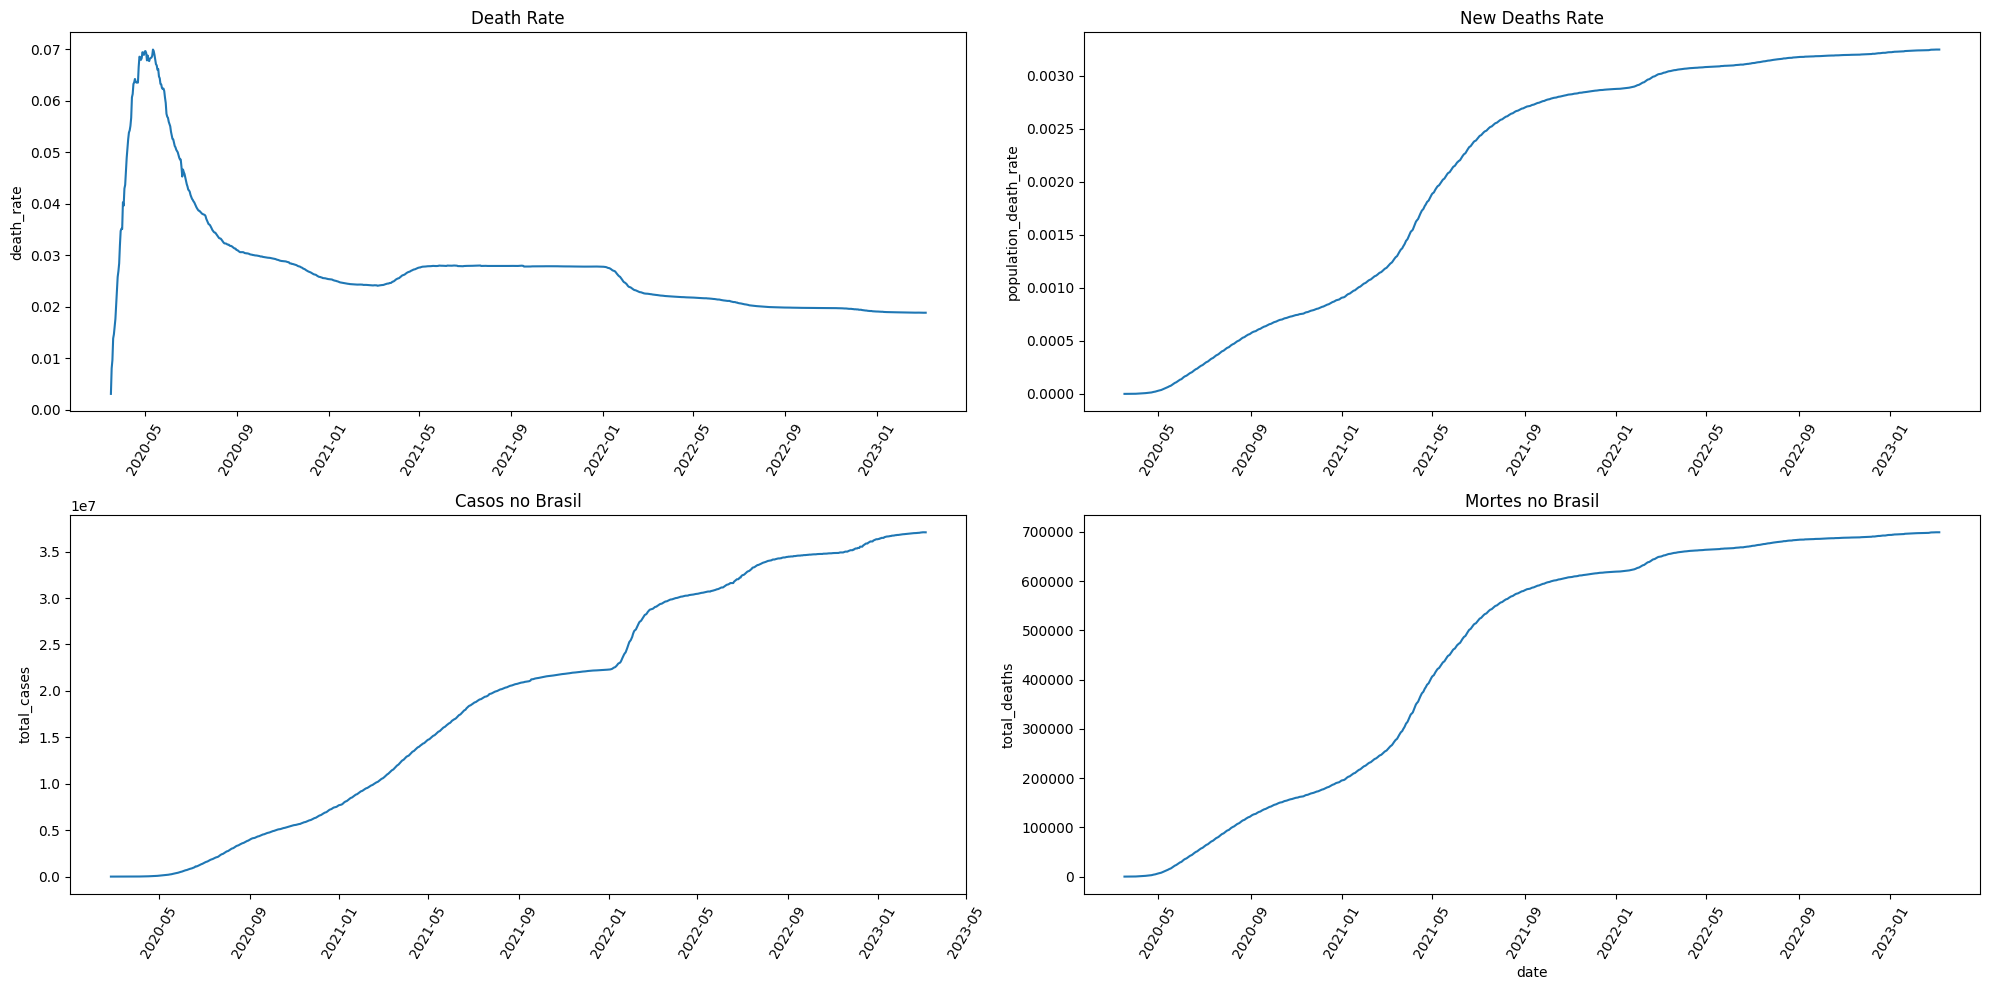

In [89]:
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(20, 10))

ax1= sns.lineplot(x="date", y="death_rate", data=df_brasil, ax=ax[0,0])
ax1.tick_params(axis='x', rotation=60)
ax1.set_xlabel(xlabel='x',visible=False)
ax1.set_title('Death Rate')

ax2 = sns.lineplot(x="date", y="population_death_rate", data=df_brasil, ax=ax[0,1]);
ax2.tick_params(axis='x', rotation=60)
ax2.set_title('New Deaths Rate')
ax2.set_xlabel(xlabel='x',visible=False)

ax3 = sns.lineplot(x="date", y="total_cases", data=df_brasil, ax=ax[1,0])
ax3.tick_params(axis='x', rotation=60)
ax3.set_xlabel(xlabel='x',visible=False)
ax3.set_title('Casos no Brasil')

ax4 = sns.lineplot(x="date", y="total_deaths", data=df_brasil, ax=ax[1,1])
ax4.tick_params(axis='x', rotation=60)
ax3.set_xlabel(xlabel='x',visible=False)
ax4.set_title('Mortes no Brasil')

plt.tight_layout()

## Conclusão

*Escreva suas conclusões e análises sobre os dados relativos à COVID-19...*